## Run data pipeline
Returns an aggegrated df to work with

In [2]:
# Only for Wesley %run "./Data"

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [141]:
pip install tqdm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [142]:
#Copy this cell to every new version of Main
#import dataframe
df = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/Daily_pivoted/HECTORdataAggregated_20240516204803.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df)}")

Number of rows in the file: 201


In [143]:
#Check for NANs 
import pandas as pd


nan_counts_df = df.isna().sum()

# Convert to string with no line width limit
nan_counts_str = nan_counts_df.to_string()

print(nan_counts_str)

Date                   0
DayOfWeek              0
AvgThrottlePerc        0
AvgBrakePerc           0
AvgMotorTemp           0
Avg24VBatt             0
AvgBattOutputPower     3
AvgMotorPowerDraw      0
AvgTotalFCPower        1
AvgTotalPowerDraw      0
AvgMotorRPM            0
AvgMotorTorque         0
NetWeight_4            0
NetWeight_5            0
NetWeight_6            0
NetWeight_7            0
NetWeight_8            0
NetWeight_9            0
NetWeight_10           0
NetWeight_11           0
NetWeight_12           0
Distance_4             0
Distance_5             0
Distance_6             0
Distance_7             0
Distance_8             0
Distance_9             0
Distance_10            0
Distance_11            0
Distance_12            0
Distance_13            0
H2Hour_4               0
H2Hour_5               0
H2Hour_6               0
H2Hour_7               0
H2Hour_8               0
H2Hour_9               0
H2Hour_10              0
H2Hour_11              0
H2Hour_12              0


#Method 1 to handle NANS
#Fill NANs with last known value
df = df.fillna(method='ffill')

#Method 2 to handle NANs, Note, this may reduce the dataset to 10% of its size, handle NANS differenctly
#drop all NANs
df = df.dropna()

In [103]:
# Toon de kolomnamen
print(df.columns)

Index(['Date', 'DayOfWeek', 'AvgThrottlePerc', 'AvgBrakePerc', 'AvgMotorTemp',
       'Avg24VBatt', 'AvgBattOutputPower', 'AvgMotorPowerDraw',
       'AvgTotalFCPower', 'AvgTotalPowerDraw', 'AvgMotorRPM', 'AvgMotorTorque',
       'NetWeight_4', 'NetWeight_5', 'NetWeight_6', 'NetWeight_7',
       'NetWeight_8', 'NetWeight_9', 'NetWeight_10', 'NetWeight_11',
       'NetWeight_12', 'Distance_4', 'Distance_5', 'Distance_6', 'Distance_7',
       'Distance_8', 'Distance_9', 'Distance_10', 'Distance_11', 'Distance_12',
       'Distance_13', 'H2Hour_4', 'H2Hour_5', 'H2Hour_6', 'H2Hour_7',
       'H2Hour_8', 'H2Hour_9', 'H2Hour_10', 'H2Hour_11', 'H2Hour_12',
       'H2Hour_13', 'H2Daily', 'NetWeightDaily', 'TotalDistanceKM', 'EEM1',
       'EEM2', 'H2perKM', 'WeightperKM', 'H2perWeight', 'AvgWeatherTemp',
       'Is_Friday', 'Is_Monday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday'],
      dtype='object')


## Import utilities
Import custom function

In [55]:
#Copy this cell to every new version of Main
%run "Utilities.ipynb" 

In [85]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
#check min/max values and number of rows
import pandas as pd

min_datetime = df['Date'].min()
max_datetime = df['Date'].max()

print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

df.shape
print(df.shape)

Minimum datetime: 2022-08-01 00:00:00
Maximum datetime: 2023-08-01 00:00:00
(201, 55)


In [128]:
#Copy this cell to every new version of Main 
# List data types of each column
dtypes_result = df.dtypes

# Display descriptive statistics for numerical columns
describe_result = df.describe()

# Combine both results in one code snippet
combined_result = pd.concat([dtypes_result, describe_result], axis=1, keys=['Data Types', 'Statistics'])

# Display the combined result
print(combined_result)


                     Data Types           Statistics                  \
                              0                 Date AvgThrottlePerc   
Date             datetime64[us]                  NaN             NaN   
DayOfWeek                object                  NaN             NaN   
AvgThrottlePerc         float64                  NaN             NaN   
AvgBrakePerc            float64                  NaN             NaN   
AvgMotorTemp            float64                  NaN             NaN   
...                         ...                  ...             ...   
25%                         NaN  2022-10-10 00:00:00        0.175804   
50%                         NaN  2023-01-18 00:00:00       86.322983   
75%                         NaN  2023-04-12 00:00:00      100.044717   
max                         NaN  2023-08-01 00:00:00      126.512179   
std                         NaN                  NaN       46.421217   

                                                               

In [144]:
 # Methode 1: Gebruik isna() of isnull() en dan sum()
aantal_nan = df.isna().sum()

# Methode 2: Gebruik any() om te controleren of er minstens één NaN-waarde is
heeft_nan = df.isna().any().any()

# Methode 3: Tel het aantal NaN-waarden in het hele DataFrame
totaal_aantal_nan = df.isna().sum().sum()

# Uitvoer resultaten
print("Aantal NaN per kolom:")
print(aantal_nan)
print("\nHeeft DataFrame NaN-waarden?")
print(heeft_nan)
print("\nTotaal aantal NaN-waarden in DataFrame:")
print(totaal_aantal_nan)

Aantal NaN per kolom:
Date                   0
DayOfWeek              0
AvgThrottlePerc        0
AvgBrakePerc           0
AvgMotorTemp           0
Avg24VBatt             0
AvgBattOutputPower     3
AvgMotorPowerDraw      0
AvgTotalFCPower        1
AvgTotalPowerDraw      0
AvgMotorRPM            0
AvgMotorTorque         0
NetWeight_4            0
NetWeight_5            0
NetWeight_6            0
NetWeight_7            0
NetWeight_8            0
NetWeight_9            0
NetWeight_10           0
NetWeight_11           0
NetWeight_12           0
Distance_4             0
Distance_5             0
Distance_6             0
Distance_7             0
Distance_8             0
Distance_9             0
Distance_10            0
Distance_11            0
Distance_12            0
Distance_13            0
H2Hour_4               0
H2Hour_5               0
H2Hour_6               0
H2Hour_7               0
H2Hour_8               0
H2Hour_9               0
H2Hour_10              0
H2Hour_11              0
H2H

In [145]:
#JoeCode check if rows contains all nans
all_nans=df.isna().all(axis=1)

nan_rows=df[all_nans]

print("rows with only nans:")
print(nan_rows)

nan_rows_count = all_nans.sum()
print("Number of rows where all values are NaNs:", nan_rows_count)


rows with only nans:
Empty DataFrame
Columns: [Date, DayOfWeek, AvgThrottlePerc, AvgBrakePerc, AvgMotorTemp, Avg24VBatt, AvgBattOutputPower, AvgMotorPowerDraw, AvgTotalFCPower, AvgTotalPowerDraw, AvgMotorRPM, AvgMotorTorque, NetWeight_4, NetWeight_5, NetWeight_6, NetWeight_7, NetWeight_8, NetWeight_9, NetWeight_10, NetWeight_11, NetWeight_12, Distance_4, Distance_5, Distance_6, Distance_7, Distance_8, Distance_9, Distance_10, Distance_11, Distance_12, Distance_13, H2Hour_4, H2Hour_5, H2Hour_6, H2Hour_7, H2Hour_8, H2Hour_9, H2Hour_10, H2Hour_11, H2Hour_12, H2Hour_13, H2Daily, NetWeightDaily, TotalDistanceKM, EEM1, EEM2, H2perKM, WeightperKM, H2perWeight, AvgWeatherTemp, Is_Friday, Is_Monday, Is_Thursday, Is_Tuesday, Is_Wednesday]
Index: []
Number of rows where all values are NaNs: 0


In [60]:
df.describe

<bound method NDFrame.describe of           Date  DayOfWeek  AvgThrottlePerc  AvgBrakePerc  AvgMotorTemp  \
0   2022-08-01     Monday        96.154244      4.550855     62.985561   
1   2022-08-02    Tuesday       103.810700      4.409901     67.736914   
2   2022-08-03  Wednesday        84.076417      3.963729     65.247415   
3   2022-08-04   Thursday        94.717933      3.792878     66.646993   
4   2022-08-05     Friday        89.798072      2.879073     64.052956   
..         ...        ...              ...           ...           ...   
196 2023-07-26  Wednesday        57.617221      6.551188     52.590803   
197 2023-07-27   Thursday         0.253036      0.075868     50.630668   
198 2023-07-28     Friday         0.000000      0.000000     27.000000   
199 2023-07-31     Monday        94.891196      9.365860     62.110089   
200 2023-08-01    Tuesday        79.568916      6.417685     63.360820   

       Avg24VBatt  AvgBattOutputPower  AvgMotorPowerDraw  AvgTotalFCPower  \


In [61]:
len(df)

201

#drop remaining NANs
df = df.dropna()

#Joecode to check columnnames after dropping nanas
df_noNAN = df
df_noNAN = df.dropna()

column_names = df_noNAN.columns.tolist()

# This will print the list of column names
print(column_names)

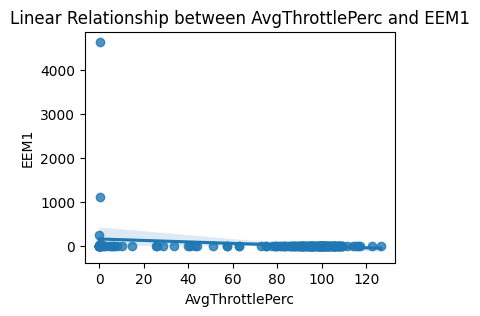

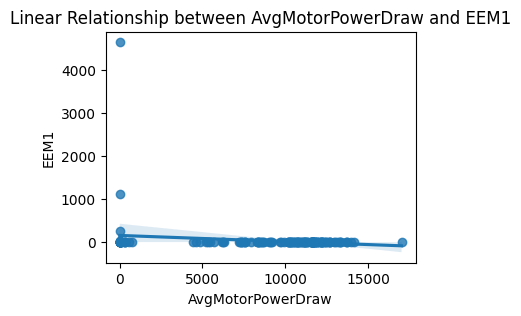

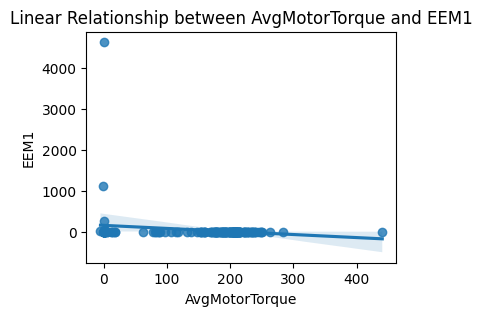

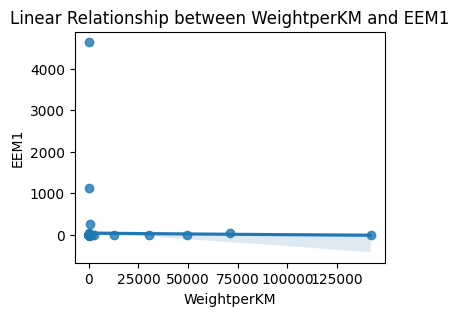

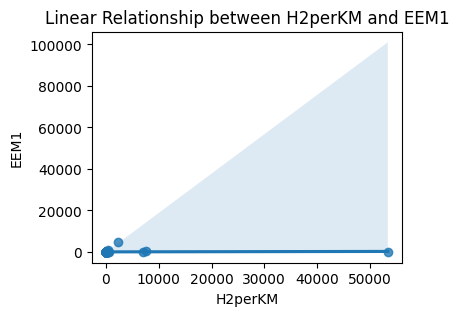

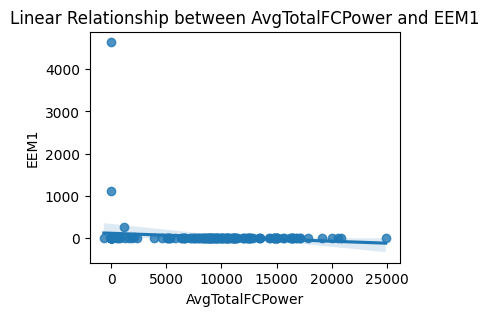

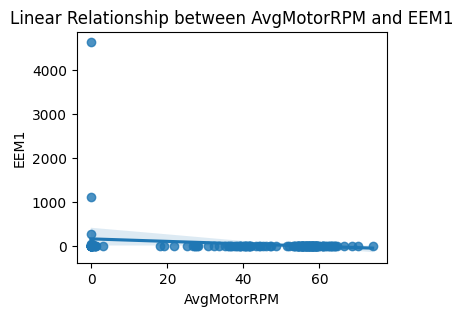

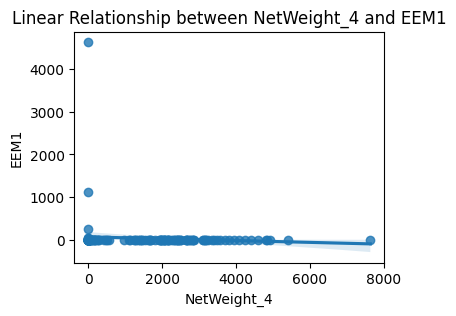

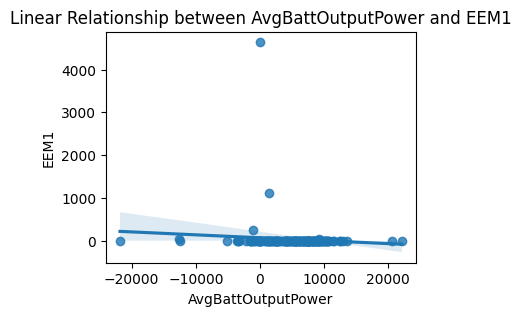

Plotting the linear relationship between AvgThrottlePerc and EEM...


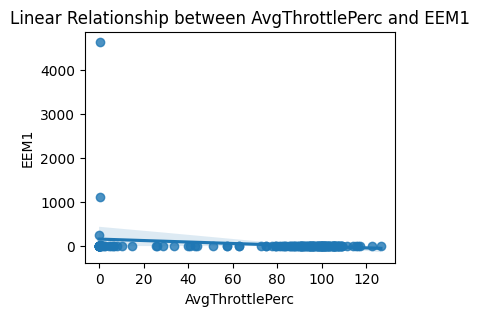

Plotting the linear relationship between AvgMotorPowerDraw Load and EEM...


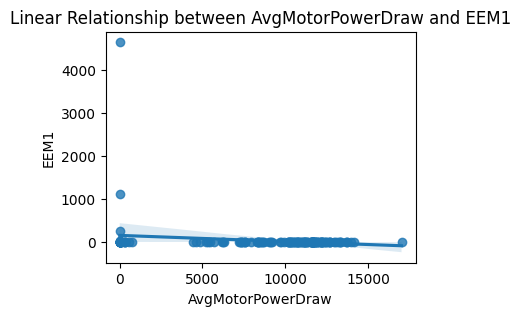

Plotting the linear relationship between AvgMotorTorque and EEM...


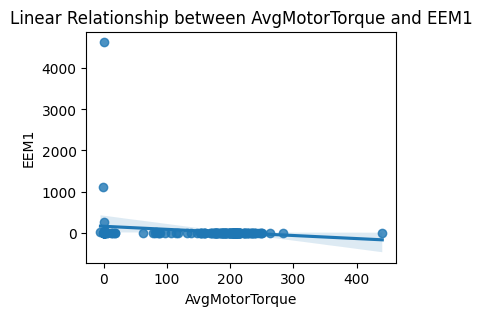

Plotting the linear relationship between WeightperKMand EEM...


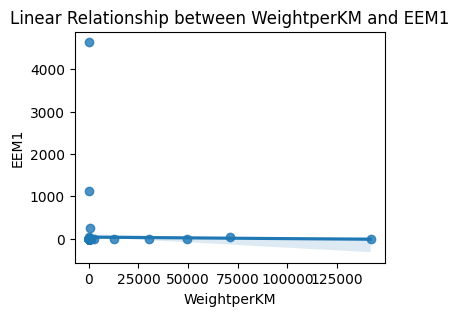

Plotting the linear relationship between MH2perKM and EEM...


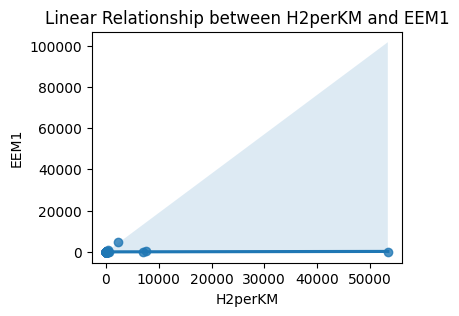

Plotting the linear relationship between AvgMotorRPMand EEM...


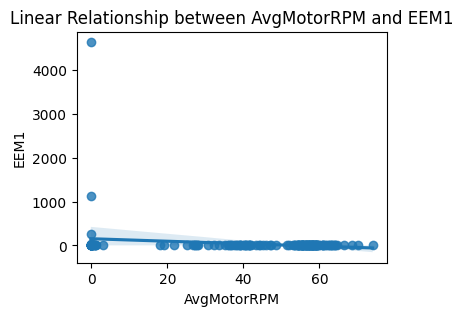

Plotting the linear relationship between NetWeight_4 and EEM..


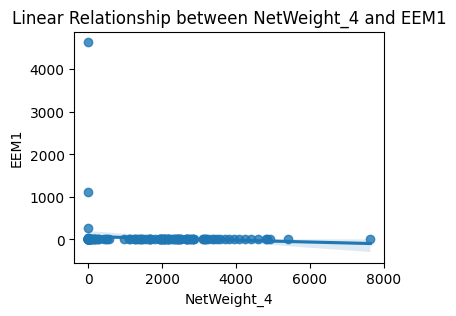

Plotting the linear relationship between AvgBattOutputPower and EEM...


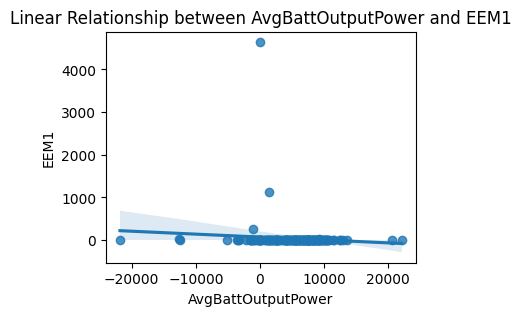

In [16]:

#check linear relationship with target variable EEM

def plot_linear_relationships(df, x_col, y_col, figsize=(4, 3)):
    """
    Plot the linear relationship between two columns from a DataFrame.
    
    - x_col: The name of the column to use as the x-axis.
    - y_col: The name of the column to use as the y-axis.
    - figsize: Tuple representing the figure size.
    """
    plt.figure(figsize=figsize)
    sns.regplot(x=x_col, y=y_col, data=df)
    plt.title(f'Linear Relationship between {x_col} and {y_col}')
    plt.show()

plot_linear_relationships(df, 'AvgThrottlePerc','EEM1')
plot_linear_relationships(df, 'AvgMotorPowerDraw','EEM1')
plot_linear_relationships(df, 'AvgMotorTorque','EEM1')
plot_linear_relationships(df, 'WeightperKM','EEM1')
plot_linear_relationships(df, 'H2perKM','EEM1')
plot_linear_relationships(df, 'AvgTotalFCPower','EEM1')
plot_linear_relationships(df, 'AvgMotorRPM','EEM1')
plot_linear_relationships(df, 'NetWeight_4','EEM1')
plot_linear_relationships(df, 'AvgBattOutputPower','EEM1')

print("Plotting the linear relationship between AvgThrottlePerc and EEM...")
plot_linear_relationships(df, 'AvgThrottlePerc', 'EEM1')

print("Plotting the linear relationship between AvgMotorPowerDraw Load and EEM...")
plot_linear_relationships(df, 'AvgMotorPowerDraw', 'EEM1')

print("Plotting the linear relationship between AvgMotorTorque and EEM...")
plot_linear_relationships(df, 'AvgMotorTorque', 'EEM1')

print("Plotting the linear relationship between WeightperKMand EEM...")
plot_linear_relationships(df, 'WeightperKM', 'EEM1')

print("Plotting the linear relationship between MH2perKM and EEM...")
plot_linear_relationships(df, 'H2perKM', 'EEM1')

print("Plotting the linear relationship between AvgMotorRPMand EEM...")
plot_linear_relationships(df, 'AvgMotorRPM', 'EEM1')

print("Plotting the linear relationship between NetWeight_4 and EEM..")
plot_linear_relationships(df, 'NetWeight_4', 'EEM1')

print("Plotting the linear relationship between AvgBattOutputPower and EEM...")
plot_linear_relationships(df, 'AvgBattOutputPower', 'EEM1')


#Conclusion, none of the above features shows a strong linear relation with thetarget variable EEM and will be kept



#pairplot to check if variables with high correlation  can be dropped- TAKE A LONG TIME


sns.pairplot(df, hue='EEM1')
plt.show()



#Pairplot TAKE A LONG TIME
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
from tqdm import tqdm

features = df.columns.drop('EEM1')  # Drop the hue column from the features list

# Create a pairplot manually with progress bar
n = len(features)
fig, axes = plt.subplots(n, n, figsize=(15, 15))

# Iterate through all pairs of features with progress bar
for (i, j), ax in zip(combinations(range(n), 2), tqdm(combinations(range(n), 2), total=n*(n-1)//2, desc="Creating pairplot")):
    sns.scatterplot(x=features[i], y=features[j], hue='EEM1', data=df, ax=axes[i, j])

# Remove unused subplots
for i in range(n):
    for j in range(n):
        if i == j:
            axes[i, j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

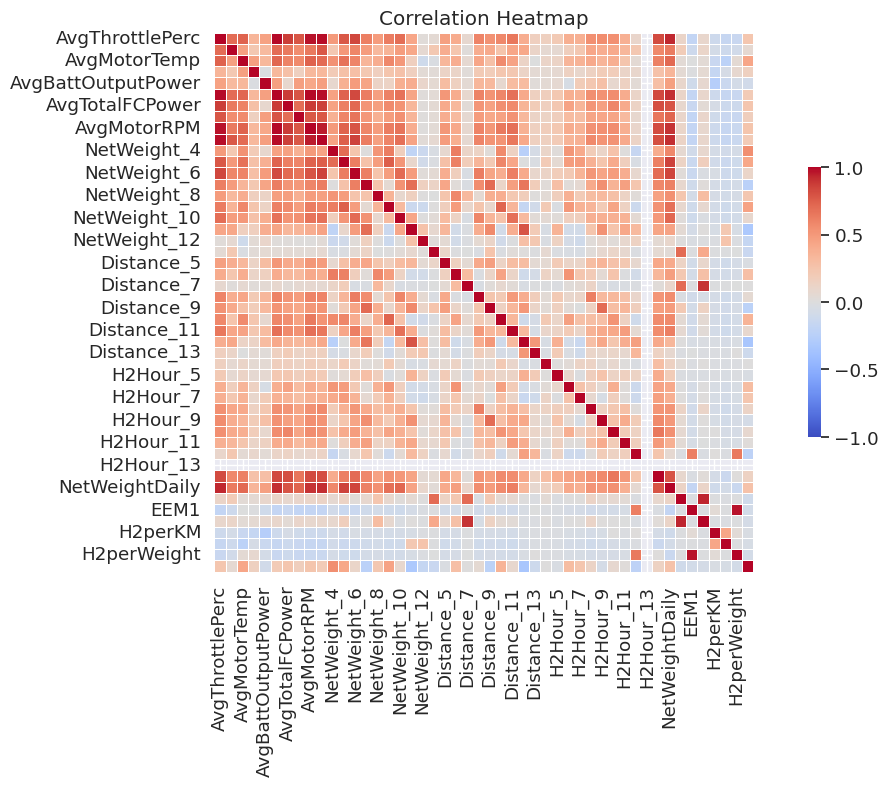


Sorted list of correlations (excluding self and duplicate pairs):
               Variable1     Variable2  Correlation
2283      AvgWeatherTemp   Distance_12    -0.341974
2273      AvgWeatherTemp  NetWeight_11    -0.317171
236   AvgBattOutputPower       H2perKM    -0.261568
1306         Distance_12   NetWeight_4    -0.246270
2269      AvgWeatherTemp   NetWeight_7    -0.227064
...                  ...           ...          ...
1870           H2Hour_13   H2perWeight          NaN
1910             H2Daily     H2Hour_13          NaN
2054                EEM1     H2Hour_13          NaN
2102                EEM2     H2Hour_13          NaN
2294      AvgWeatherTemp     H2Hour_13          NaN

[1128 rows x 3 columns]


In [62]:
#Heatmap to check if variables with high correlation  can be dropped
floats = df.select_dtypes(include="float64")
df1 = floats.corr()

# Set up the heatmap figure size
plt.figure(figsize=(14, 7))

# Customize the heatmap using seaborn's heatmap function without annotations
heatmap = sns.heatmap(
    df1,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Set font scale for better readability
sns.set(font_scale=1.2)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

# Extract and sort the correlations
corr_pairs = df1.unstack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
# Remove self correlations
corr_pairs = corr_pairs[corr_pairs['Variable1'] != corr_pairs['Variable2']]
# Remove duplicate pairs (i.e., keep one of (A, B) and (B, A))
corr_pairs = corr_pairs[corr_pairs['Variable1'] < corr_pairs['Variable2']]
# Sort by correlation
sorted_corr_pairs = corr_pairs.sort_values(by='Correlation', ascending=True)

# Print the sorted list of correlations
print("\nSorted list of correlations (excluding self and duplicate pairs):")
print(sorted_corr_pairs)

In [18]:
#check for other features with possible high correlation

import pandas as pd


# Calculate the correlation between 'AvgBattOutputPower' and 'AvgBattOutputPower'
correlation1 = df['AvgBattOutputPower'].corr(df['AvgBattOutputPower'])

# Calculate the correlation between 'AvgBattOutputPower' and 'MAvgMotorPowerDraw'
correlation2= df['AvgBattOutputPower'].corr(df['AvgMotorPowerDraw'])

# Calculate the correlation between 'AvgTotalPowerDraw' and 'NetWeightDaily'
correlation3= df['AvgTotalPowerDraw'].corr(df['NetWeightDaily'])

# Calculate the correlation between 'TotalDistanceKM' and 'H2Daily'
correlation4= df['TotalDistanceKM'].corr(df['H2Daily'])
# Print the correlation value
print("Correlation between AvgBattOutputPower and AvgBattOutputPower:", correlation1)
print("Correlation between AvgBattOutputPower and MAvgMotorPowerDraw:", correlation2)
print("Correlation between AvgTotalPowerDraw' and 'NetWeightDaily:", correlation3)
print("Correlation between TotalDistanceKM' and 'H2Daily:", correlation4)




Correlation between AvgBattOutputPower and AvgBattOutputPower: 1.0
Correlation between AvgBattOutputPower and MAvgMotorPowerDraw: 0.4650097312470187
Correlation between AvgTotalPowerDraw' and 'NetWeightDaily: 0.7335899601595635
Correlation between TotalDistanceKM' and 'H2Daily: 0.08151004776237905


In [130]:
#Joecode, check number of NANs before splitting train and test set
#Check for Nans  before regression
# Count the number of NaNs in each column
nan_counts_df = df.isna().sum()

pd.set_option('display.max_columns', None)
# Print the count of NaNs for each column
print(nan_counts_df)


Date                   0
DayOfWeek              0
AvgThrottlePerc        0
AvgBrakePerc           0
AvgMotorTemp           0
Avg24VBatt             0
AvgBattOutputPower     3
AvgMotorPowerDraw      0
AvgTotalFCPower        1
AvgTotalPowerDraw      0
AvgMotorRPM            0
AvgMotorTorque         0
NetWeight_4            0
NetWeight_5            0
NetWeight_6            0
NetWeight_7            0
NetWeight_8            0
NetWeight_9            0
NetWeight_10           0
NetWeight_11           0
NetWeight_12           0
Distance_4             0
Distance_5             0
Distance_6             0
Distance_7             0
Distance_8             0
Distance_9             0
Distance_10            0
Distance_11            0
Distance_12            0
Distance_13            0
H2Hour_4               0
H2Hour_5               0
H2Hour_6               0
H2Hour_7               0
H2Hour_8               0
H2Hour_9               0
H2Hour_10              0
H2Hour_11              0
H2Hour_12              0


In [146]:
#JoeCode , replace NANS 



# Fill  with the last known value
columns_last_known = ['H2perWeight']
df[columns_last_known] = df[columns_last_known].fillna(method='ffill')

# Fill with average of previous last known and preceding first known values
def fill_with_avg(df, column):
    # Get the series where NaNs are located
    nan_indices = df[column].isna()
    
    # Calculate rolling average before and after NaN values
    forward_fill = df[column].fillna(method='ffill')
    backward_fill = df[column].fillna(method='bfill')
    
    # Calculate average of forward and backward fill values
    df[column] = np.where(nan_indices, (forward_fill + backward_fill) / 2, df[column])

columns_avg = ['H2perKM', 'AvgBattOutputPower', 'AvgTotalFCPower', 'WeightperKM']
for column in columns_avg:
    fill_with_avg(df, column)

# Drop all other rows containing NaNs
df.dropna(inplace=True)

# Print the updated DataFrame to verify changes
print(df)


          Date  DayOfWeek  AvgThrottlePerc  AvgBrakePerc  AvgMotorTemp  \
0   2022-08-01     Monday        96.154244      4.550855     62.985561   
1   2022-08-02    Tuesday       103.810700      4.409901     67.736914   
2   2022-08-03  Wednesday        84.076417      3.963729     65.247415   
3   2022-08-04   Thursday        94.717933      3.792878     66.646993   
4   2022-08-05     Friday        89.798072      2.879073     64.052956   
..         ...        ...              ...           ...           ...   
193 2023-07-21     Friday       100.044717      6.577408     65.586861   
194 2023-07-24     Monday        90.254516      6.510147     62.728650   
195 2023-07-25    Tuesday        98.814611      6.522829     65.721530   
199 2023-07-31     Monday        94.891196      9.365860     62.110089   
200 2023-08-01    Tuesday        79.568916      6.417685     63.360820   

       Avg24VBatt  AvgBattOutputPower  AvgMotorPowerDraw  AvgTotalFCPower  \
0    27469.011339         9851.671

/tmp/ipykernel_161743/3550391123.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columns_last_known] = df[columns_last_known].fillna(method='ffill')
/tmp/ipykernel_161743/3550391123.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_fill = df[column].fillna(method='ffill')
/tmp/ipykernel_161743/3550391123.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  backward_fill = df[column].fillna(method='bfill')


In [147]:
#JoeCode remove the rows with NANs that has NANS in target EMM2 and EMM2
df.dropna(subset=['EEM1', 'EEM2'])

,Date,DayOfWeek,AvgThrottlePerc,AvgBrakePerc,AvgMotorTemp,Avg24VBatt,AvgBattOutputPower,AvgMotorPowerDraw,AvgTotalFCPower,AvgTotalPowerDraw,AvgMotorRPM,AvgMotorTorque,NetWeight_4,NetWeight_5,NetWeight_6,NetWeight_7,NetWeight_8,NetWeight_9,NetWeight_10,NetWeight_11,NetWeight_12,Distance_4,Distance_5,Distance_6,Distance_7,Distance_8,Distance_9,Distance_10,Distance_11,Distance_12,Distance_13,H2Hour_4,H2Hour_5,H2Hour_6,H2Hour_7,H2Hour_8,H2Hour_9,H2Hour_10,H2Hour_11,H2Hour_12,H2Hour_13,H2Daily,NetWeightDaily,TotalDistanceKM,EEM1,EEM2,H2perKM,WeightperKM,H2perWeight,AvgWeatherTemp,Is_Friday,Is_Monday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,2022-08-01,Monday,96.154244,4.550855,62.985561,27469.011339,9851.671079,11945.666054,8703.830764,14305.731671,58.763331,206.924819,2280.747137,3601.083333,3100.750000,654.833333,472.933333,3512.016667,2725.533333,500.850000,55.333333,5.344842,2.441296,6.556771,31.981089,5.157300,0.978467,15.831868,22.404232,0.240586,0.0,0.0,0.0,0.0,1673.0,1651.0,1802.0,0.0,0.0,0.0,0.0,5126.0,16904.080471,90.936451,0.003335,299.882381,56.369035,185.888940,0.303240,20.6,0,1,0,0,0
1,2022-08-02,Tuesday,103.810700,4.409901,67.736914,27348.589110,1419.682794,12684.985133,17103.906737,15623.545252,64.187143,204.140830,482.150000,2684.516667,4360.850000,1368.500000,531.816667,2449.483333,2449.000000,489.766667,24.283333,6.534194,8.223727,2.496873,1.484345,39.214317,5.611346,19.847941,16.820958,0.048788,0.0,24.0,306.0,1024.0,508.0,2055.0,1135.0,2549.0,1844.0,0.0,0.0,9445.0,14840.366667,100.282489,0.006346,157.567910,94.183941,147.985623,0.636440,21.5,0,0,0,1,0
2,2022-08-03,Wednesday,84.076417,3.963729,65.247415,27338.805697,949.707554,10789.367357,14826.676794,12730.509983,56.721119,181.837248,2633.333333,3099.733333,2127.033333,1514.450000,585.033333,4108.216667,1102.566667,304.000000,0.000000,4.566503,2.749421,2.401625,7.688783,34.895879,3.354465,22.954519,9.522599,0.092700,0.0,0.0,0.0,729.0,1148.0,2194.0,1420.0,1352.0,1342.0,0.0,0.0,8185.0,15474.366667,88.226494,0.005995,166.798916,92.772585,175.393647,0.528939,25.5,0,0,0,0,1
3,2022-08-04,Thursday,94.717933,3.792878,66.646993,27276.035623,3248.896387,11908.918308,15044.350989,14046.182042,59.917634,187.057854,2316.083333,2451.366667,4652.766667,743.433333,2086.716667,4488.166667,272.833333,448.166667,7.383333,5.127555,2.866547,4.397478,31.310260,8.295285,2.270954,12.387934,26.975626,0.043984,0.0,0.0,0.0,1044.0,2181.0,1680.0,621.0,621.0,2154.0,0.0,0.0,8301.0,17466.916667,93.675623,0.005073,197.111709,88.614303,186.461709,0.475241,25.9,0,0,1,0,0
4,2022-08-05,Friday,89.798072,2.879073,64.052956,27543.454952,-299.587139,11117.024355,14714.915635,12619.090758,59.974876,177.726531,957.666667,3205.166667,3233.233333,1071.416667,847.583333,5765.966667,1818.533333,154.750000,0.000000,6.129699,3.415388,4.405980,36.646752,4.101552,3.989209,31.744742,3.728018,0.501942,0.0,0.0,0.0,1021.0,2565.0,819.0,1070.0,2470.0,419.0,0.0,0.0,8364.0,17054.316667,94.663282,0.005181,193.019798,88.355271,180.157673,0.490433,18.9,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2023-07-21,Friday,100.044717,6.577408,65.586861,27521.683126,5616.436787,11617.144634,9316.942257,12698.984614,55.382885,210.923081,2332.716667,5950.883333,1009.002000,396.983333,151.516667,4359.400000,631.933333,125.866667,0.000000,4.678090,3.851871,20.447484,11.477299,7.605379,6.143862,20.718888,11.016731,0.258023,0.0,0.0,0.0,1770.0,1459.0,102.0,0.0,2056.0,0.0,0.0,0.0,5387.0,14958.302000,86.197627,0.004178,239.348458,62.495920,173.534962,0.360134,16.6,1,0,0,0,0
194,2023-07-24,Monday,90.254516,6.510147,62.728650,27531.042933,5688.821029,8679.645957,7556.214938,10801.156269,37.412778,187.789595,1666.200000,4397.816667,3327.466667,225.533333,2303.000000,3208.333333,1364.983333,118.983333,0.000000,4.197562,2.944131,4.326140,4.510195,5.029344,5.38

In [148]:
##Joecode, check number of NANs before splitting train and test set
# Check NaN counts for 'EEM1 and EEM2' column 
nan_counts_eem1_eem2 = df[['EEM1', 'EEM2']].isna().sum()
print(f"NaN counts in 'EEM1/EEM2': {nan_counts_eem1_eem2}")



NaN counts in 'EEM1/EEM2': EEM1    0
EEM2    0
dtype: int64


In [149]:
#Select the varaibles to inlcude in the test and trainset X set and separate the target y for test and train
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Target variable: Since EEM= MAX(H2Daily) / (MAX(NetWeightDaily) * MAX(TotalDistanceKM)) AS EEM is the target ,we need to drop all tehese features used to construct EEM
#Target variable: Since  EEM2=(MAX(NetWeightDaily) * MAX(TotalDistanceKM)) / MAX(H2Daily) AS EEM2, is the target ,we need to drop all tehese features used to construct EEM

X = df.drop(['EEM1','EEM2', 'H2Daily', 'NetWeightDaily', 'TotalDistanceKM'], axis=1)  # Veronderstel dat deze kolommen zijn verwijderd
y1 = df['EEM1']
y2 = df['EEM2']

# Normaliseer de data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [134]:
print("Columns of X:")
print(X.columns)


Columns of X:
Index(['Date', 'DayOfWeek', 'AvgThrottlePerc', 'AvgBrakePerc', 'AvgMotorTemp',
       'Avg24VBatt', 'AvgBattOutputPower', 'AvgMotorPowerDraw',
       'AvgTotalFCPower', 'AvgTotalPowerDraw', 'AvgMotorRPM', 'AvgMotorTorque',
       'NetWeight_4', 'NetWeight_5', 'NetWeight_6', 'NetWeight_7',
       'NetWeight_8', 'NetWeight_9', 'NetWeight_10', 'NetWeight_11',
       'NetWeight_12', 'Distance_4', 'Distance_5', 'Distance_6', 'Distance_7',
       'Distance_8', 'Distance_9', 'Distance_10', 'Distance_11', 'Distance_12',
       'Distance_13', 'H2Hour_4', 'H2Hour_5', 'H2Hour_6', 'H2Hour_7',
       'H2Hour_8', 'H2Hour_9', 'H2Hour_10', 'H2Hour_11', 'H2Hour_12',
       'H2Hour_13', 'H2perKM', 'WeightperKM', 'H2perWeight', 'AvgWeatherTemp',
       'Is_Friday', 'Is_Monday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday'],
      dtype='object')


In [151]:
# Splits de data for EEM1
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1,y2, test_size=0.2, random_state=42) 

#Print the number of rows in X_train and X_test
print("Number of rows in X_train:", X_train.shape[0])
print("Number of rows in X_test:", X_test.shape[0])
print("Number of rows in y1_train:", y1_train.shape[0])
print("Number of rows in y1_test:", y1_test.shape[0])
print("Number of rows in y2_train:", y2_train.shape[0])
print("Number of rows in y2_test:", y2_test.shape[0])

Number of rows in X_train: 119
Number of rows in X_test: 30
Number of rows in y1_train: 119
Number of rows in y1_test: 30
Number of rows in y2_train: 119
Number of rows in y2_test: 30


In [150]:

print("Number of rows in y1", y1.shape[0])
print("Number of rows in y2", y2.shape[0])
print("Number of rows in X", X.shape[0])

Number of rows in y1 149
Number of rows in y2 149
Number of rows in X 149


In [97]:
#Check for NANs i target
nan_counts_y_train1 = y1_train.isna().sum()
print(nan_counts_y_train1)
nan_counts_y_train2 = y2_train.isna().sum()
print(nan_counts_y_train2)

0
0


In [159]:
# train  OLS ordinary least squares regression

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np

# Assuming X_train, X_test, y1_train, y1_test, y2_train, y2_test are predefined

# Ensure all features are numeric
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Step 1: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames to retain column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Step 2: Fitting the OLS model for EEM1
X_train_scaled_with_const1 = sm.add_constant(X_train_scaled_df)
model1 = sm.OLS(y1_train, X_train_scaled_with_const1).fit()

# Step 2: Fitting the OLS model for EEM2
X_train_scaled_with_const2 = sm.add_constant(X_train_scaled_df)
model2 = sm.OLS(y2_train, X_train_scaled_with_const2).fit()

# Step 3: Testing the model for EEM1
X_test_scaled_with_const1 = sm.add_constant(X_test_scaled_df)
y1_pred = model1.predict(X_test_scaled_with_const1)
mse1 = mean_squared_error(y1_test, y1_pred)

# Step 3: Testing the model for EEM2
X_test_scaled_with_const2 = sm.add_constant(X_test_scaled_df)
y2_pred = model2.predict(X_test_scaled_with_const2)
mse2 = mean_squared_error(y2_test, y2_pred)

# Display the results for EEM1
print(model1.summary())
print("Mean Squared Error EEM1 on Test Set:", mse1)

# Display the results for EEM2
print(model2.summary())
print("Mean Squared Error EEM2 on Test Set:", mse2)


                            OLS Regression Results                            
Dep. Variable:                   EEM1   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     42.00
Date:                Sat, 18 May 2024   Prob (F-statistic):           2.54e-37
Time:                        18:27:07   Log-Likelihood:                -693.90
No. Observations:                 119   AIC:                             1482.
Df Residuals:                      72   BIC:                             1612.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 51.2906      9

In [160]:
#Check num of rows , colums and type in the X_Scaled set and y set
print(X_train_scaled.shape)
print(type(X_train_scaled))
print(y1.shape)
print(type(y1))
print(y2.shape)
print(type(y2))

(119, 48)
<class 'numpy.ndarray'>
(149,)
<class 'pandas.core.series.Series'>
(149,)
<class 'pandas.core.series.Series'>


END OF PREPROCESSING    

In [152]:
#check which format the dataset is
print("Type of df for X:",type(X_train_scaled))
print("Type of df for y1:",type(y1))
print("Type of df for y2:",type(y2))

Type of df for X: <class 'numpy.ndarray'>
Type of df for y1: <class 'pandas.core.series.Series'>
Type of df for y2: <class 'pandas.core.series.Series'>


In [164]:
# train a linear regression model, use the scaled trainingset X_scaled for EEM1
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit on training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the model for EEM2
model = LinearRegression()
model.fit(X_train_scaled, y1_train)

# Step 3: Make predictions for EEM2
y1_pred = model.predict(X_test_scaled)

# Step 4: Evaluate the model for EEM2
mse1 = mean_squared_error(y1_test, y1_pred)
r21 = r2_score(y1_test, y1_pred)

print(f"Mean Squared Error (MSE) for EEM2: {mse1}")
print(f"Coefficient of Determination (R^2) for EEM2: {r21}")

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = model.coef_

# Pair each feature name with its corresponding coefficient
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by the absolute value of their coefficients in descending order
feature_coefficients_sorted = feature_coefficients.reindex(feature_coefficients.Coefficient.abs().sort_values(ascending=False).index)

# Print the feature names alongside their coefficients
print("Feature Coefficients in Descending Order for EEM1:")
print(feature_coefficients_sorted)

Mean Squared Error (MSE) for EEM2: 10506.140453760783
Coefficient of Determination (R^2) for EEM2: -1670720.7400226304
Feature Coefficients in Descending Order for EEM1:
               Feature   Coefficient
41         H2perWeight  4.268916e+02
7    AvgTotalPowerDraw  2.065929e+02
5    AvgMotorPowerDraw -1.108765e+02
6      AvgTotalFCPower -1.075225e+02
4   AvgBattOutputPower -9.283840e+01
3           Avg24VBatt -8.286411e+01
9       AvgMotorTorque  4.903853e+01
39             H2perKM -3.245809e+01
0      AvgThrottlePerc -3.149860e+01
8          AvgMotorRPM  3.059343e+01
24          Distance_9 -2.378784e+01
47        Is_Wednesday  2.305096e+01
13         NetWeight_7  2.256964e+01
15         NetWeight_9  1.417747e+01
33            H2Hour_8 -1.311014e+01
23          Distance_8 -1.103207e+01
46          Is_Tuesday -9.623947e+00
10         NetWeight_4 -8.837835e+00
19          Distance_4  8.773146e+00
1         AvgBrakePerc -8.449010e+00
18        NetWeight_12  8.357160e+00
20          Dist

In [165]:
# train a linear regression model, use the scaled trainingset X_scaled for EEM2
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit on training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the model for EEM2
model = LinearRegression()
model.fit(X_train_scaled, y2_train)

# Step 3: Make predictions for EEM2
y2_pred = model.predict(X_test_scaled)

# Step 4: Evaluate the model for EEM2
mse2 = mean_squared_error(y2_test, y2_pred)
r22 = r2_score(y2_test, y2_pred)

print(f"Mean Squared Error (MSE) for EEM2: {mse2}")
print(f"Coefficient of Determination (R^2) for EEM2: {r22}")

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = model.coef_

# Pair each feature name with its corresponding coefficient
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by the absolute value of their coefficients in descending order
feature_coefficients_sorted = feature_coefficients.reindex(feature_coefficients.Coefficient.abs().sort_values(ascending=False).index)

# Print the feature names alongside their coefficients
print("Feature Coefficients in Descending Order for EEM2:")
print(feature_coefficients_sorted)


Mean Squared Error (MSE) for EEM2: 10824.002590990392
Coefficient of Determination (R^2) for EEM2: 0.43415847363096305
Feature Coefficients in Descending Order for EEM2:
               Feature   Coefficient
22          Distance_7  4.117289e+03
19          Distance_4  1.951598e+03
7    AvgTotalPowerDraw -6.245323e+01
23          Distance_8  4.457708e+01
8          AvgMotorRPM -4.266117e+01
5    AvgMotorPowerDraw  3.566814e+01
24          Distance_9  3.496056e+01
11         NetWeight_5  3.180448e+01
25         Distance_10  3.035109e+01
35           H2Hour_10 -2.575796e+01
0      AvgThrottlePerc  2.478176e+01
21          Distance_6  2.370634e+01
32            H2Hour_7 -2.335775e+01
14         NetWeight_8  2.211595e+01
16        NetWeight_10  2.153443e+01
29            H2Hour_4 -2.118274e+01
26         Distance_11  1.932197e+01
37           H2Hour_12 -1.868254e+01
27         Distance_12  1.856197e+01
36           H2Hour_11 -1.793596e+01
34            H2Hour_9 -1.728601e+01
17        NetWei

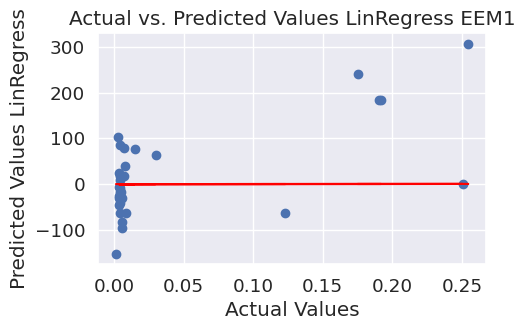

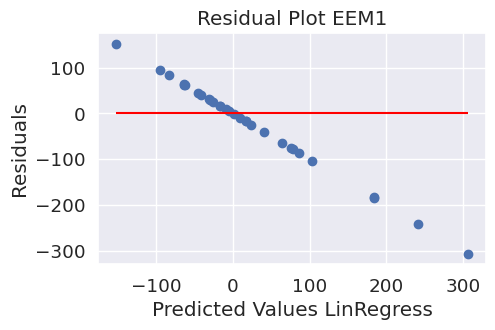

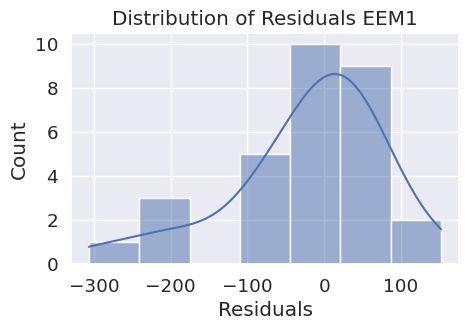

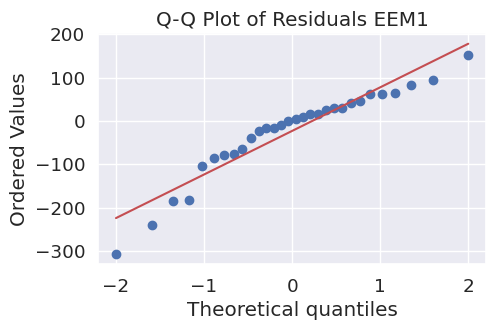

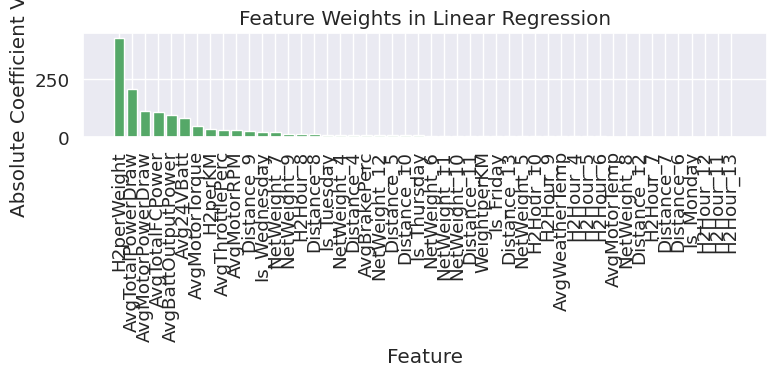

In [33]:
# residuals, predict vs actuals, qq plots for LinearRegression EEM1
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression



# Training a Linear Regression model
model1 = LinearRegression()
model1.fit(X_train_scaled, y1_train)

# Predicting values for the testing set
y1_pred = model1.predict(X_test_scaled)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(5, 3))
plt.scatter(y1_test, y1_pred)
plt.plot(y1_test, y1_test, color='red')  # Ideal line where predicted values equal actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values LinRegress')
plt.title('Actual vs. Predicted Values LinRegress EEM1')
plt.show()

# Calculating residuals
residuals = y1_test - y1_pred

# Plotting Residuals
plt.figure(figsize=(5, 3))
plt.scatter(y1_pred, residuals)
plt.hlines(y=0, xmin=y1_pred.min(), xmax=y1_pred.max(), color='red')
plt.xlabel('Predicted Values LinRegress')
plt.ylabel('Residuals')
plt.title('Residual Plot EEM1')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals EEM1')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals EEM1')
plt.show()

# Assuming 'model' is your trained LinearRegression instance and 'X_train' is your feature DataFrame
coefficients = model1.coef_

# Getting absolute values of coefficients to somewhat mimic "importance"
absolute_coefficients = np.abs(coefficients)

# Sorting indices of coefficients by their absolute values in descending order
indices = np.argsort(absolute_coefficients)[::-1]

# Plotting the coefficients (mimicking feature importances)
plt.figure(figsize=(8, 4))
sorted_feature_names = np.array(X_train.columns)[indices]
plt.title('Feature Weights in Linear Regression')
plt.bar(range(X_train.shape[1]), absolute_coefficients[indices], color='g', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()



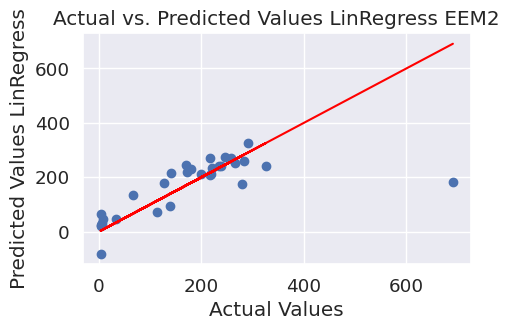

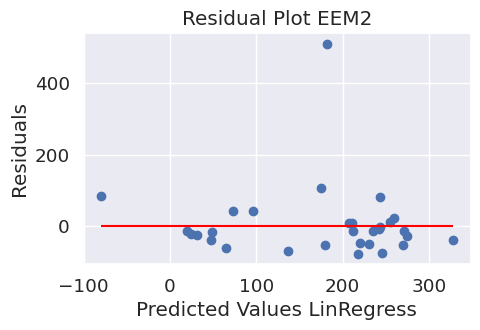

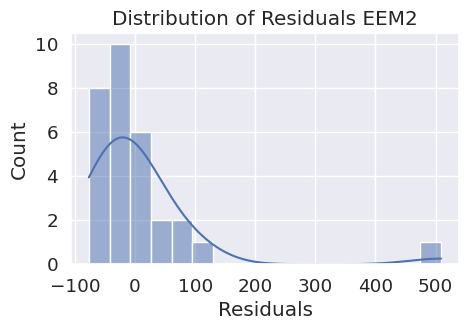

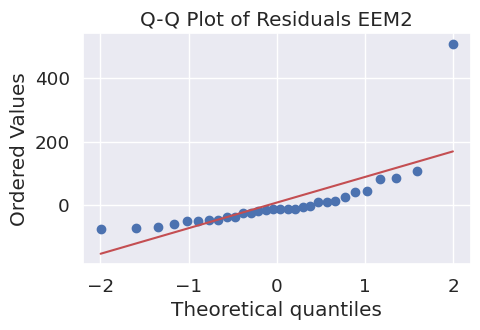

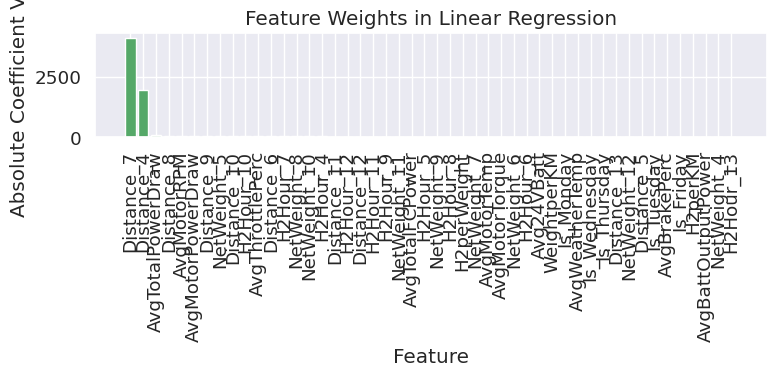

In [34]:
# residuals, predict vs actuals, qq plots for LinearRegression for EEM2
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression



# Training a Linear Regression model
model2 = LinearRegression()
model2.fit(X_train_scaled, y2_train)

# Predicting values for the testing set
y2_pred = model.predict(X_test_scaled)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(5, 3))
plt.scatter(y2_test, y2_pred)
plt.plot(y2_test, y2_test, color='red')  # Ideal line where predicted values equal actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values LinRegress')
plt.title('Actual vs. Predicted Values LinRegress EEM2')
plt.show()

# Calculating residuals
residuals = y2_test - y2_pred

# Plotting Residuals
plt.figure(figsize=(5, 3))
plt.scatter(y2_pred, residuals)
plt.hlines(y=0, xmin=y2_pred.min(), xmax=y2_pred.max(), color='red')
plt.xlabel('Predicted Values LinRegress')
plt.ylabel('Residuals')
plt.title('Residual Plot EEM2')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals EEM2')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals EEM2')
plt.show()

# Assuming 'model' is your trained LinearRegression instance and 'X_train' is your feature DataFrame
coefficients = model2.coef_

# Getting absolute values of coefficients to somewhat mimic "importance"
absolute_coefficients = np.abs(coefficients)

# Sorting indices of coefficients by their absolute values in descending order
indices = np.argsort(absolute_coefficients)[::-1]

# Plotting the coefficients (mimicking feature importances)
plt.figure(figsize=(8, 4))
sorted_feature_names = np.array(X_train.columns)[indices]
plt.title('Feature Weights in Linear Regression')
plt.bar(range(X_train.shape[1]), absolute_coefficients[indices], color='g', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

#THIS CODE DOESNT WORK< CELL DEACTIVATED
#Run the model on a selection of the data EEM1


def predict_EEM1(df, model1):
    """
    Applies a trained Linear Regression model to predict 'EEM' on anew dataset.

    """

    # Check if orig_data is a DataFrame or ndarray and select features accordingly
    if isinstance(df, pd.DataFrame):
        # If orig_data is a DataFrame, ensure it contains the same features as X_train
        features = df[X_train_scaled.columns] if 'X_train_scaled' in globals() or 'X_train_scaled' in locals() else df
    elif isinstance(df, np.ndarray):
        # If orig_data is an ndarray, assume it's already structured correctly
        features = df
    else:
        raise ValueError("orig_data must be a pandas DataFrame or a numpy ndarray.")

    # Use the model to make predictions on the provided features
    predictions = model.predict(features)

    return predictions

# Example usage:
# predictions = predict_EMM(orig_data, model)


In [135]:
print(X_train.shape)
print(type(X_train))

(119, 53)
<class 'pandas.core.frame.DataFrame'>


APPLY THE MODEL ON THE ORIGINAL DATASET

RANDOMFOREST

#THIS CODE RUNS IN ERROR
#find the best hyperparamters for 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500]  # You can adjust this list based on your computational budget
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y1_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Print the best number of trees
print("Best number of trees (n_estimators) for EEM1:", best_rf.n_estimators)

# Optionally, evaluate its performance on the test set
predictions = best_rf.predict(X_test)
mse = mean_squared_error(y1_test, predictions)
print("Test MSE for the best model for EEM1:", mse)

#Run RandomForestRegressor with Best number of trees (n_estimators): 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Create the RandomForestRegressor object
# n_estimators is the number of trees in the forest, you can adjust this and other parameters as needed
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_regressor.fit(X_train_scaled, y1_train)

# Make predictions on the training set and the test set
y1_train_pred = random_forest_regressor.predict(X_train_scaled)
y1_test_pred = random_forest_regressor.predict(X_train_scaled)

# Calculate the performance metrics
train_mse = mean_squared_error(y1_train, y1_train_pred)
test_mse = mean_squared_error(y1_test, y1_test_pred)
train_r2 = r2_score(y1_train, y1_train_pred)
test_r2 = r2_score(y1_test, y1_test_pred)

# Print the performance metrics
print(f"Training MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {test_r2:.3f}")

# Feature Importance
feature_importances = random_forest_regressor.feature_importances_
# Assuming you want to print feature importance
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance:.3f}")

In [154]:
#RF Forest EEM1
# Identify timestamp columns
timestamp_columns = X.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
print(f"Timestamp columns: {timestamp_columns}")

# Select numeric columns and target variable, excluding timestamp columns
X = X.drop(columns=timestamp_columns).select_dtypes(include=[np.number])
y1 = df['EEM1']

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Step 1: Scaling the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the RandomForestRegressor model with scaled data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y1_train)

# Step 3: Make predictions on the training set and the test set
y1_train_pred = rf.predict(X_train_scaled)
y1_test_pred = rf.predict(X_test_scaled)

# Step 4: Calculate the performance metrics
train_mse = mean_squared_error(y1_train, y1_train_pred)
test_mse = mean_squared_error(y1_test, y1_test_pred)
train_r2 = r2_score(y1_train, y1_train_pred)
test_r2 = r2_score(y1_test, y1_test_pred)

# Print the performance metrics
print(f"Training MSE EEM1: {train_mse:.3f}")
print(f"Test MSE EEM1: {test_mse:.3f}")
print(f"Training R^2 EEM1: {train_r2:.3f}")
print(f"Test R^2 EEM1: {test_r2:.3f}")

# Feature Importance
feature_importances = rf.feature_importances_
# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

Timestamp columns: Index(['Date'], dtype='object')
Training MSE EEM1: 32650.311
Test MSE EEM1: 174.621
Training R^2 EEM1: 0.827
Test R^2 EEM1: -27767.739
Feature Importances:
AvgThrottlePerc: 0.000
AvgBrakePerc: 0.000
AvgMotorTemp: 0.017
Avg24VBatt: 0.232
AvgBattOutputPower: 0.010
AvgMotorPowerDraw: 0.000
AvgTotalFCPower: 0.018
AvgTotalPowerDraw: 0.002
AvgMotorRPM: 0.002
AvgMotorTorque: 0.044
NetWeight_4: 0.004
NetWeight_5: 0.005
NetWeight_6: 0.000
NetWeight_7: 0.000
NetWeight_8: 0.000
NetWeight_9: 0.000
NetWeight_10: 0.000
NetWeight_11: 0.000
NetWeight_12: 0.000
Distance_4: 0.000
Distance_5: 0.002
Distance_6: 0.000
Distance_7: 0.000
Distance_8: 0.000
Distance_9: 0.000
Distance_10: 0.000
Distance_11: 0.000
Distance_12: 0.006
Distance_13: 0.000
H2Hour_4: 0.000
H2Hour_5: 0.000
H2Hour_6: 0.000
H2Hour_7: 0.000
H2Hour_8: 0.000
H2Hour_9: 0.006
H2Hour_10: 0.000
H2Hour_11: 0.000
H2Hour_12: 0.229
H2Hour_13: 0.000
H2perKM: 0.112
WeightperKM: 0.088
H2perWeight: 0.217
AvgWeatherTemp: 0.003
Is_Frid

Training MSE EEM1: 3021652.378
Test MSE EEM1: 67367.035
Training R^2 EEM1: 0.854
Test R^2 EEM1: -2.522
Feature Importances:
AvgThrottlePerc: 0.000
AvgBrakePerc: 0.001
AvgMotorTemp: 0.000
Avg24VBatt: 0.000
AvgBattOutputPower: 0.003
AvgMotorPowerDraw: 0.000
AvgTotalFCPower: 0.002
AvgTotalPowerDraw: 0.001
AvgMotorRPM: 0.001
AvgMotorTorque: 0.003
NetWeight_4: 0.001
NetWeight_5: 0.157
NetWeight_6: 0.000
NetWeight_7: 0.008
NetWeight_8: 0.020
NetWeight_9: 0.003
NetWeight_10: 0.001
NetWeight_11: 0.000
NetWeight_12: 0.003
Distance_4: 0.111
Distance_5: 0.013
Distance_6: 0.035
Distance_7: 0.041
Distance_8: 0.002
Distance_9: 0.026
Distance_10: 0.007
Distance_11: 0.000
Distance_12: 0.000
Distance_13: 0.000
H2Hour_4: 0.000
H2Hour_5: 0.000
H2Hour_6: 0.000
H2Hour_7: 0.004
H2Hour_8: 0.000
H2Hour_9: 0.001
H2Hour_10: 0.000
H2Hour_11: 0.005
H2Hour_12: 0.000
H2Hour_13: 0.000
H2perKM: 0.423
WeightperKM: 0.021
H2perWeight: 0.040
AvgWeatherTemp: 0.062
Is_Friday: 0.001
Is_Monday: 0.000
Is_Thursday: 0.000
Is_Tu

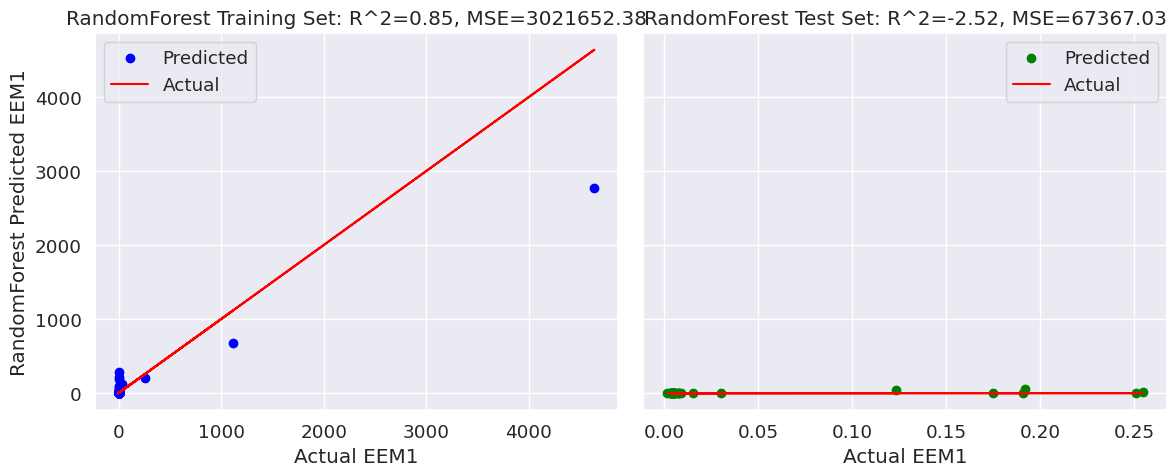

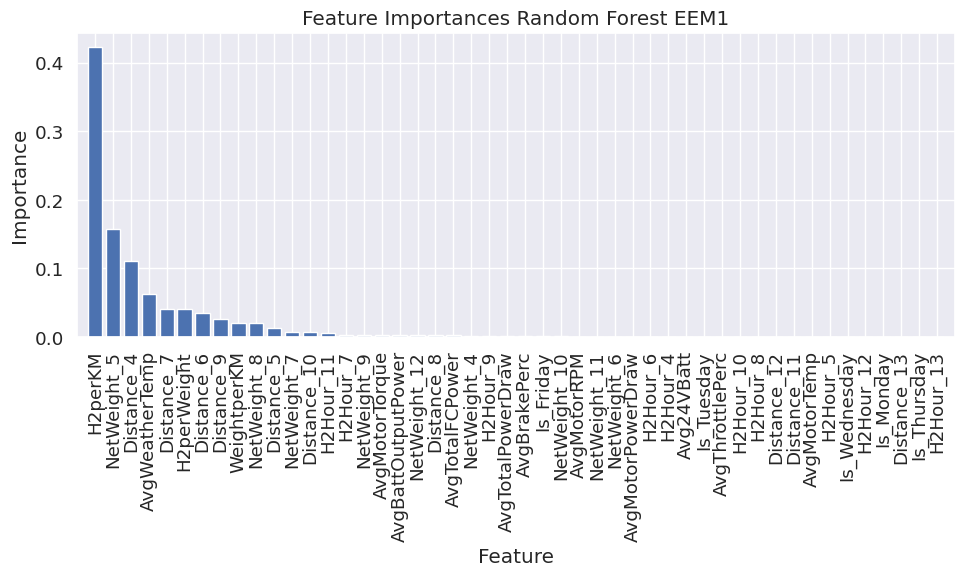

In [166]:
#Plot the the random forest results for EEM1
# Print the performance metrics 
print(f"Training MSE EEM1: {train_mse:.3f}")
print(f"Test MSE EEM1: {test_mse:.3f}")
print(f"Training R^2 EEM1: {train_r2:.3f}")
print(f"Test R^2 EEM1: {test_r2:.3f}")

# Feature Importance
feature_importances = rf.feature_importances_
# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

# Plotting the Actual vs. Predicted values for both training and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set plot
ax[0].scatter(y1_train, y1_train_pred, color='blue', label='Predicted')
ax[0].plot(y1_train, y1_train, color='red', label='Actual')  # A line for perfect predictions
ax[0].set_title(f'RandomForest Training Set: R^2={train_r2:.2f}, MSE={train_mse:.2f}')
ax[0].set_xlabel('Actual EEM1')
ax[0].set_ylabel('RandomForest Predicted EEM1')
ax[0].legend()

# Test set plot
ax[1].scatter(y1_test, y1_test_pred, color='green', label='Predicted')
ax[1].plot(y1_test, y1_test, color='red', label='Actual')  # A line for perfect predictions
ax[1].set_title(f'RandomForest Test Set: R^2={test_r2:.2f}, MSE={test_mse:.2f}')
ax[1].set_xlabel('Actual EEM1')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plotting feature importances
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Get the feature names in the order of importance
sorted_feature_names = X_train.columns[indices]

# Plot the feature importances in descending order
plt.title('Feature Importances Random Forest EEM1')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()  # This can help with fitting the labels
plt.show()

In [167]:
#RF Forest EEM2
# Identify timestamp columns
timestamp_columns = X.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
print(f"Timestamp columns: {timestamp_columns}")

# Select numeric columns and target variable, excluding timestamp columns
X = X.drop(columns=timestamp_columns).select_dtypes(include=[np.number])
y2 = df['EEM2']

# Split the data into training and testing sets
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Step 1: Scaling the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the RandomForestRegressor model with scaled data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y2_train)

# Step 3: Make predictions on the training set and the test set
y2_train_pred = rf.predict(X_train_scaled)
y2_test_pred = rf.predict(X_test_scaled)

# Step 4: Calculate the performance metrics
train_mse = mean_squared_error(y2_train, y2_train_pred)
test_mse = mean_squared_error(y2_test, y2_test_pred)
train_r2 = r2_score(y2_train, y2_train_pred)
test_r2 = r2_score(y2_test, y2_test_pred)

# Print the performance metrics
print(f"Training MSE EEM2: {train_mse:.3f}")
print(f"Test MSE EEM2: {test_mse:.3f}")
print(f"Training R^2 EEM2: {train_r2:.3f}")
print(f"Test R^2 EEM2: {test_r2:.3f}")

# Feature Importance
feature_importances = rf.feature_importances_
# Print feature importances
print("Feature Importances EEM2:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

Timestamp columns: Index([], dtype='object')
Training MSE EEM2: 3021652.378
Test MSE EEM2: 67367.035
Training R^2 EEM2: 0.854
Test R^2 EEM2: -2.522
Feature Importances EEM2:
AvgThrottlePerc: 0.000
AvgBrakePerc: 0.001
AvgMotorTemp: 0.000
Avg24VBatt: 0.000
AvgBattOutputPower: 0.003
AvgMotorPowerDraw: 0.000
AvgTotalFCPower: 0.002
AvgTotalPowerDraw: 0.001
AvgMotorRPM: 0.001
AvgMotorTorque: 0.003
NetWeight_4: 0.001
NetWeight_5: 0.157
NetWeight_6: 0.000
NetWeight_7: 0.008
NetWeight_8: 0.020
NetWeight_9: 0.003
NetWeight_10: 0.001
NetWeight_11: 0.000
NetWeight_12: 0.003
Distance_4: 0.111
Distance_5: 0.013
Distance_6: 0.035
Distance_7: 0.041
Distance_8: 0.002
Distance_9: 0.026
Distance_10: 0.007
Distance_11: 0.000
Distance_12: 0.000
Distance_13: 0.000
H2Hour_4: 0.000
H2Hour_5: 0.000
H2Hour_6: 0.000
H2Hour_7: 0.004
H2Hour_8: 0.000
H2Hour_9: 0.001
H2Hour_10: 0.000
H2Hour_11: 0.005
H2Hour_12: 0.000
H2Hour_13: 0.000
H2perKM: 0.423
WeightperKM: 0.021
H2perWeight: 0.040
AvgWeatherTemp: 0.062
Is_Frida

Training MSE EEM2: 3021652.378
Test MSE EEM2: 67367.035
Training R^2 EEM2: 0.854
Test R^2 EEM2: -2.522
Feature Importances EEM2:
AvgThrottlePerc: 0.000
AvgBrakePerc: 0.001
AvgMotorTemp: 0.000
Avg24VBatt: 0.000
AvgBattOutputPower: 0.003
AvgMotorPowerDraw: 0.000
AvgTotalFCPower: 0.002
AvgTotalPowerDraw: 0.001
AvgMotorRPM: 0.001
AvgMotorTorque: 0.003
NetWeight_4: 0.001
NetWeight_5: 0.157
NetWeight_6: 0.000
NetWeight_7: 0.008
NetWeight_8: 0.020
NetWeight_9: 0.003
NetWeight_10: 0.001
NetWeight_11: 0.000
NetWeight_12: 0.003
Distance_4: 0.111
Distance_5: 0.013
Distance_6: 0.035
Distance_7: 0.041
Distance_8: 0.002
Distance_9: 0.026
Distance_10: 0.007
Distance_11: 0.000
Distance_12: 0.000
Distance_13: 0.000
H2Hour_4: 0.000
H2Hour_5: 0.000
H2Hour_6: 0.000
H2Hour_7: 0.004
H2Hour_8: 0.000
H2Hour_9: 0.001
H2Hour_10: 0.000
H2Hour_11: 0.005
H2Hour_12: 0.000
H2Hour_13: 0.000
H2perKM: 0.423
WeightperKM: 0.021
H2perWeight: 0.040
AvgWeatherTemp: 0.062
Is_Friday: 0.001
Is_Monday: 0.000
Is_Thursday: 0.000


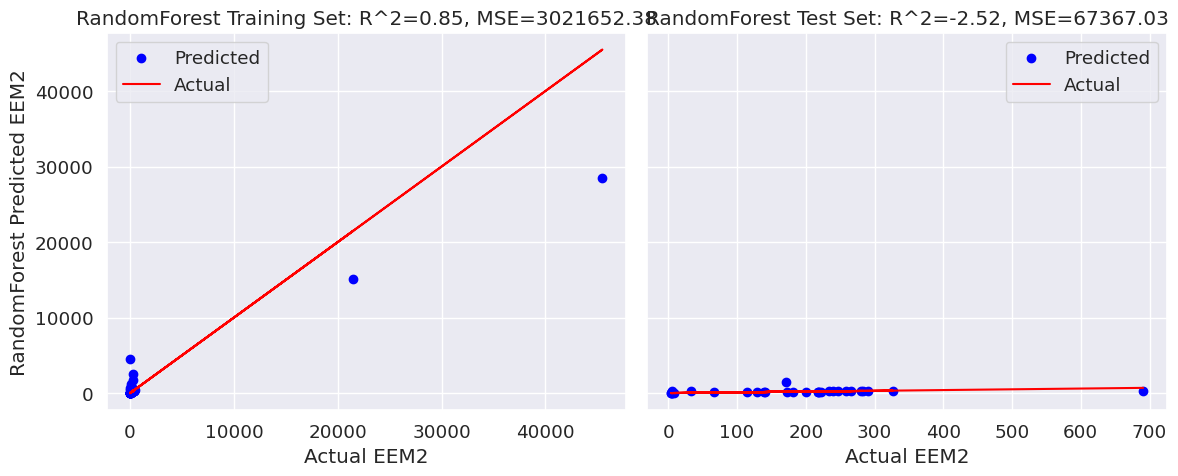

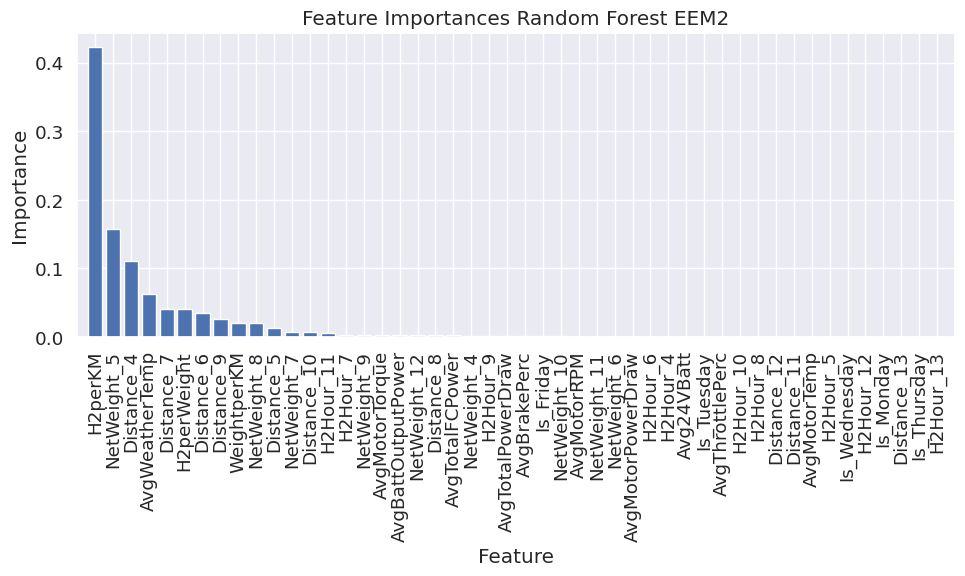

In [168]:
#Plot the the random forest results for EEM2
# Print the performance metrics 
print(f"Training MSE EEM2: {train_mse:.3f}")
print(f"Test MSE EEM2: {test_mse:.3f}")
print(f"Training R^2 EEM2: {train_r2:.3f}")
print(f"Test R^2 EEM2: {test_r2:.3f}")

# Feature Importance
feature_importances = rf.feature_importances_
# Print feature importances
print("Feature Importances EEM2:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

# Plotting the Actual vs. Predicted values for both training and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set plot
ax[0].scatter(y2_train, y2_train_pred, color='blue', label='Predicted')
ax[0].plot(y2_train, y2_train, color='red', label='Actual')  # A line for perfect predictions
ax[0].set_title(f'RandomForest Training Set: R^2={train_r2:.2f}, MSE={train_mse:.2f}')
ax[0].set_xlabel('Actual EEM2')
ax[0].set_ylabel('RandomForest Predicted EEM2')
ax[0].legend()

# Test set plot
ax[1].scatter(y2_test, y2_test_pred, color='blue', label='Predicted')
ax[1].plot(y2_test, y2_test, color='red', label='Actual')  # A line for perfect predictions
ax[1].set_title(f'RandomForest Test Set: R^2={test_r2:.2f}, MSE={test_mse:.2f}')
ax[1].set_xlabel('Actual EEM2')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plotting feature importances
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Get the feature names in the order of importance
sorted_feature_names = X_train.columns[indices]

# Plot the feature importances in descending order
plt.title('Feature Importances Random Forest EEM2')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()  # This can help with fitting the labels
plt.show()

GBM (Gradient Boosting Machine) , sequentally adds predictors (as in descision trees) whee every added feature corrects its predecessor, thereby imprving the models accuraty step by step.  
GBM iteratively reduce errors using multiple weak learners, making it highly effective for a wide range of problems, 

Training MSE: 0.093
Test MSE: 3.815
Training R^2: 1.000
Test R^2: -605.721


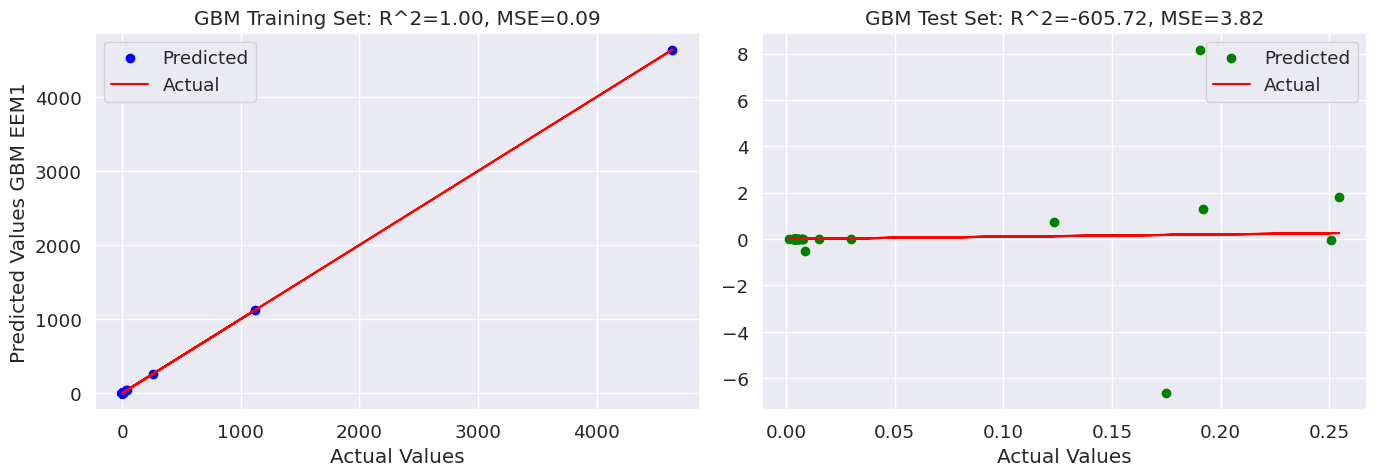

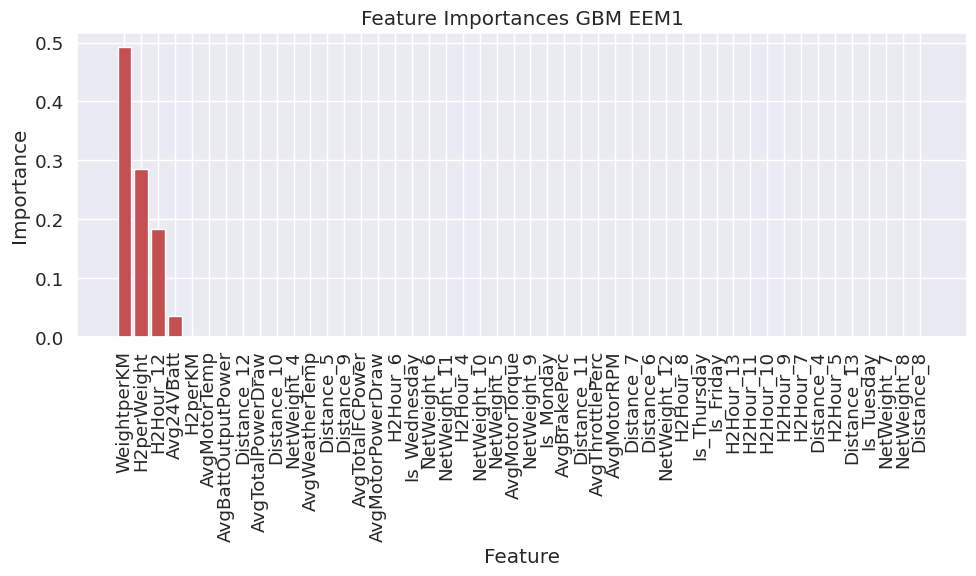

In [169]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and fit the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_regressor.fit(X_train, y1_train)

# Predict on training and test sets
y1_train_pred_gbm = gbm_regressor.predict(X_train)
y1_test_pred_gbm = gbm_regressor.predict(X_test)

# Calculate and print performance metrics
train_mse_gbm = mean_squared_error(y1_train, y1_train_pred_gbm)
test_mse_gbm = mean_squared_error(y1_test, y1_test_pred_gbm)
train_r2_gbm = r2_score(y1_train, y1_train_pred_gbm)
test_r2_gbm = r2_score(y1_test, y1_test_pred_gbm)

print(f"Training MSE: {train_mse_gbm:.3f}")
print(f"Test MSE: {test_mse_gbm:.3f}")
print(f"Training R^2: {train_r2_gbm:.3f}")
print(f"Test R^2: {test_r2_gbm:.3f}")

# Plotting Actual vs Predicted values for both training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y1_train, y1_train_pred_gbm, color='blue', label='Predicted')
axes[0].plot(y1_train, y1_train, color='red', label='Actual')  # Ideal line where predicted values equal actual values
axes[0].set_title(f'GBM Training Set: R^2={train_r2_gbm:.2f}, MSE={train_mse_gbm:.2f}')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values GBM EEM1')
axes[0].legend()

axes[1].scatter(y1_test, y1_test_pred_gbm, color='green', label='Predicted')
axes[1].plot(y1_test, y1_test, color='red', label='Actual')
axes[1].set_title(f'GBM Test Set: R^2={test_r2_gbm:.2f}, MSE={test_mse_gbm:.2f}')
axes[1].set_xlabel('Actual Values')
axes[1].legend()

plt.tight_layout()
plt.show()

# Extracting feature importances
feature_importances_gbm = gbm_regressor.feature_importances_

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances_gbm)[::-1]

# Retrieve the sorted feature names based on these indices
sorted_feature_names = X_train.columns[indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances GBM EEM1')
plt.bar(range(X_train.shape[1]), feature_importances_gbm[indices], color='r', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [231]:
#Apply the GBM model on the original data

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new_gbm = df[feature_names]

# Drop the nans
X_new_cleaned_gbm = X_new_gbm.dropna()

# Making predictions

y_new_pred_gbm = gbm_regressor.predict(X_new_cleaned_gbm)

# Insert predictions into the cleaned DataFrame
X_new_cleaned_gbm['Predicted_TotalPowerDraw'] = y_new_pred_gbm

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions_gbm = df.merge(X_new_cleaned_gbm[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere

# Calculate the Percentage Difference
# Ensure 'TotalPowerDraw' is in df_with_predictions. If not, adjust the source DataFrame accordingly.
df_with_predictions_gbm['Percentage_Difference'] = (abs(df_with_predictions_gbm['TotalPowerDraw'] - df_with_predictions_gbm['Predicted_TotalPowerDraw']) / df_with_predictions_gbm['TotalPowerDraw']) * 100

# Optional: Handle cases where TotalPowerDraw is zero to avoid division by zero issues
df_with_predictions_gbm['Percentage_Difference'] = df_with_predictions_gbm['Percentage_Difference'].replace([np.inf, -np.inf], np.nan)

print('Predictions with GBM')
print(df_with_predictions_gbm[['TotalPowerDraw', 'Predicted_TotalPowerDraw', 'Percentage_Difference']])



Predictions with GBM
      TotalPowerDraw  Predicted_TotalPowerDraw  Percentage_Difference
0       13713.046695              13103.516211               4.444895
1        9444.155245               8630.468432               8.615771
2       12075.898738              12377.403153               2.496745
3       40680.984837              39793.925820               2.180525
4        5412.054734               5193.992592               4.029193
...              ...                       ...                    ...
2645     5549.933717               3413.326357              38.497890
2648      602.394526                522.301471              13.295781
2650      689.177584                586.588659              14.885703
2659      266.421418               -204.458799             176.742629
2661      876.396552                137.608524              84.298372

[954 rows x 3 columns]
